In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [6]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_data = pd.merge(trial_data, mouse_data, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint & Convert to DataFrame
mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
mean_tumor_vol = pd.DataFrame(mouse_trial_grouped["Tumor Volume (mm3)"].mean())
mean_tumor_vol = mean_tumor_vol.reset_index(drop = False)

# Preview DataFrame
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [20]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint &Convert to DataFrame
mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
sem_tumor_vol = pd.DataFrame(mouse_trial_grouped["Tumor Volume (mm3)"].sem())
sem_tumor_vol = sem_tumor_vol.reset_index(drop = False)

# Preview DataFrame
sem_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [59]:
# Minor Data Munging to Re-Format the Data Frames
drug_list = mean_tumor_vol["Drug"].unique()
time_list = mean_tumor_vol["Timepoint"].unique()
drug_lim = len(drug_list)
time_lim = len(time_list)

mouse_mean_munge = pd.DataFrame([[mean_tumor_vol.iloc[d*10 + t, 2] for t in range(0, time_lim)] for d in range(0, drug_lim)])
mouse_mean_munge_df = pd.DataFrame({drug_list[i] : mouse_mean_munge.iloc[i,:] for i in range(0, drug_lim)})
mouse_mean_munge_df["Timepoint"] = time_list 
mouse_mean_munge_df = mouse_mean_munge_df.set_index("Timepoint")

mouse_sem_munge = pd.DataFrame([[sem_tumor_vol.iloc[d*10 + t, 2] for t in range(0, time_lim)] for d in range(0, drug_lim)])
mouse_sem_munge_df = pd.DataFrame({drug_list[i] : mouse_sem_munge.iloc[i,:] for i in range(0, drug_lim)})
mouse_sem_munge_df["Timepoint"] = time_list 
mouse_sem_munge_df = mouse_sem_munge_df.set_index("Timepoint")

# Preview that Reformatting worked
mouse_sem_munge_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


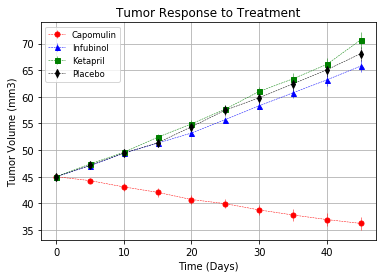

In [87]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

drug = "Capomulin"
ax.errorbar(time_list, mouse_mean_munge_df[drug], yerr=mouse_sem_munge_df[drug], fmt="o", color="r", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Infubinol"
ax.errorbar(time_list, mouse_mean_munge_df[drug], yerr=mouse_sem_munge_df[drug], fmt="^", color="b", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Ketapril"
ax.errorbar(time_list, mouse_mean_munge_df[drug], yerr=mouse_sem_munge_df[drug], fmt="s", color="g", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Placebo"
ax.errorbar(time_list, mouse_mean_munge_df[drug], yerr=mouse_sem_munge_df[drug], fmt="d", color="black", ls = "--",
            label=drug, ms = 5, lw = 0.5)

#ax.set_xlim(-0.5, len(means))

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid()

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

plt.savefig("Tumor Response.png")


In [88]:
plt.show()

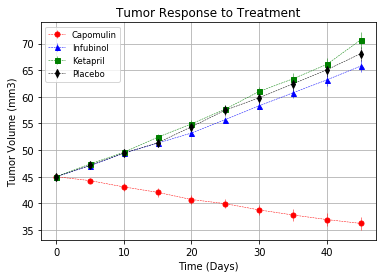

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [99]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
mean_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].mean())

mean_tumor_met.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [100]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].sem())
sem_tumor_met.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [101]:
mean_tumor_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [102]:
# Minor Data Munging to Re-Format the Data Frames
#mean_tumor_met = mean_tumor_met.reset_index(drop = False)
#sem_tumor_met = sem_tumor_met.reset_index(drop = False)

met_mean_munge = pd.DataFrame([[mean_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
met_mean_munge_df = pd.DataFrame({drug_list[i] : met_mean_munge.iloc[i,:] for i in range(0, drug_lim)})
met_mean_munge_df["Timepoint"] = time_list 
met_mean_munge_df = met_mean_munge_df.set_index("Timepoint")

met_sem_munge = pd.DataFrame([[sem_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
met_sem_munge_df = pd.DataFrame({drug_list[i] : met_sem_munge.iloc[i,:] for i in range(0, drug_lim)})
met_sem_munge_df["Timepoint"] = time_list 
met_sem_munge_df = met_sem_munge_df.set_index("Timepoint")

met_mean_munge_df

# Preview that Reformatting worked


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


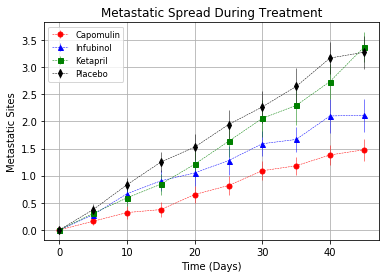

In [103]:
# Generate the Plot (with Error Bars)
fig_met, ax_met = plt.subplots()

drug = "Capomulin"
ax_met.errorbar(time_list, met_mean_munge_df[drug], yerr=met_sem_munge_df[drug], fmt="o", color="r", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Infubinol"
ax_met.errorbar(time_list, met_mean_munge_df[drug], yerr=met_sem_munge_df[drug], fmt="^", color="b", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Ketapril"
ax_met.errorbar(time_list, met_mean_munge_df[drug], yerr=met_sem_munge_df[drug], fmt="s", color="g", ls = "--",
            label=drug, ms = 5, lw = 0.5)
drug = "Placebo"
ax_met.errorbar(time_list, met_mean_munge_df[drug], yerr=met_sem_munge_df[drug], fmt="d", color="black", ls = "--",
            label=drug, ms = 5, lw = 0.5)

#ax.set_xlim(-0.5, len(means))

ax_met.set_title("Metastatic Spread During Treatment")
ax_met.set_xlabel("Time (Days)")
ax_met.set_ylabel("Metastatic Sites")
plt.grid()

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

plt.savefig("Metastatic Spread.png")

# Save the Figure

# Show the Figure


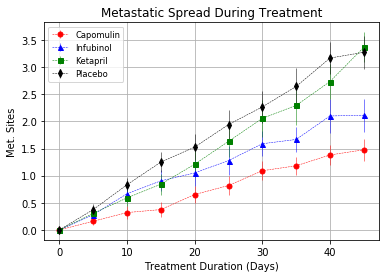

## Survival Rates

In [104]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].count())

count_tumor_met.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                        25
          5                        25
          10                       25
          15                       24
          20                       23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [106]:
# Minor Data Munging to Re-Format the Data Frames

met_count_munge = pd.DataFrame([[count_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
met_count_munge_df = pd.DataFrame({drug_list[i] : met_count_munge.iloc[i,:] for i in range(0, drug_lim)})
met_count_munge_df["Timepoint"] = time_list 
met_count_munge_df = met_count_munge_df.set_index("Timepoint")

met_count_munge_df
met_pct = met_count_munge_df/25*100
met_pct

# Preview the Data Frame


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


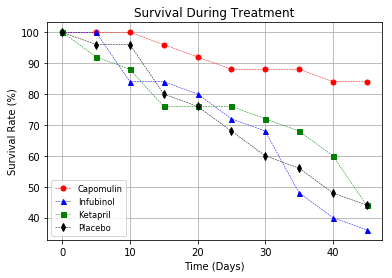

In [115]:
# Generate the Plot (Accounting for percentages)
fig_count, ax_count = plt.subplots()

drug = "Capomulin"
ax_count.plot(time_list, met_pct[drug], marker="o", color="r", ls = "--", label=drug, ms = 5, lw = 0.5)
drug = "Infubinol"
ax_count.plot(time_list, met_pct[drug], marker="^", color="b", ls = "--", label=drug, ms = 5, lw = 0.5)
drug = "Ketapril"
ax_count.plot(time_list, met_pct[drug], marker="s", color="g", ls = "--", label=drug, ms = 5, lw = 0.5)
drug = "Placebo"
ax_count.plot(time_list, met_pct[drug], marker="d", color="black", ls = "--", label=drug, ms = 5, lw = 0.5)

#ax.set_xlim(-0.5, len(means))

ax_count.set_title("Survival During Treatment")
ax_count.set_xlabel("Time (Days)")
ax_count.set_ylabel("Survival Rate (%)")
plt.grid()

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

plt.savefig("Survival During Treatment.png")


# Save the Figure

# Show the Figure
plt.show()

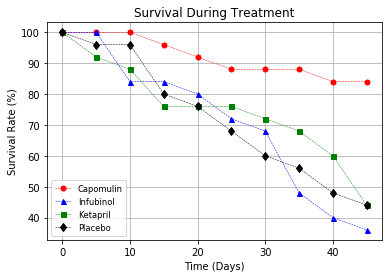

## Summary Bar Graph

In [118]:
# Calculate the percent changes for each drug
pct_chg = (mouse_mean_munge_df.iloc[9,:] - mouse_mean_munge_df.iloc[0,:])/mouse_mean_munge_df.iloc[0,:]*100
pct_chg
# Display the data to confirm


Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

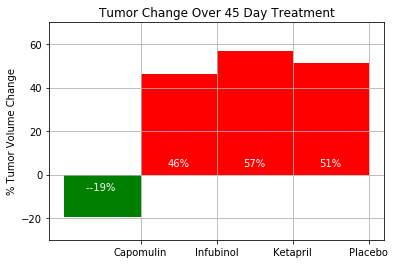